# Regularized Regression

## IMPORTS

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
def LatexTableRidge(y_actual, y_test, y_pred_in_sample, y_pred_split_test, k, data_name):
    # Get the number of observations (m) or (t) for the test set
    m = len(y_actual)  # Number of observations in the original dataset
    t = len(y_test)  # Number of observations in the test set

    # Calculate SSR (Sum of Squared Residuals)
    ssr_in_sample = np.sum((y_actual - y_pred_in_sample)**2)
    ssr_test = np.sum((y_test - y_pred_split_test)**2)

    # Calculate SST (Total Sum of Squares)
    sst_in_sample = np.sum((y_actual - np.mean(y_actual))**2)
    sst_test = np.sum((y_test - np.mean(y_test))**2)

    # Compute R-squared
    r_squared_in_sample = 1 - (ssr_in_sample / sst_in_sample)
    r_squared_test = 1 - (ssr_test / sst_test)

    # Calculate Adjusted R-squared
    r_squared_adj_in_sample = 1 - (1 - r_squared_in_sample) * (m) / (m - k)
    r_squared_adj_test = 1 - (1 - r_squared_test) * (t) / (t - k)

    # Standard Deviation of the Errors (SDE)
    sde_in_sample = np.sqrt(ssr_in_sample / (m - k))
    sde_test = np.sqrt(ssr_test / (t))

    # Calculate Mean Squared Error
    mse0_in_sample = sst_in_sample / m
    mse0_test = sst_test / t

    # Root Mean Squared Error
    rmse_in_sample = np.sqrt(ssr_in_sample / (m - k))
    rmse_test = np.sqrt(ssr_test / (t))

    # Mean Absolute Error
    mae_in_sample = np.mean(np.abs(y_actual - y_pred_in_sample))
    mae_test = np.mean(np.abs(y_test - y_pred_split_test))

    # Symmetric Mean Absolute Percentage Error (SMAPE)
    smape_in_sample = np.mean(2 * np.abs(y_actual - y_pred_in_sample) / (np.abs(y_actual) + np.abs(y_pred_in_sample))) * 100
    smape_test = np.mean(2 * np.abs(y_test - y_pred_split_test) / (np.abs(y_test) + np.abs(y_pred_split_test))) * 100  

    # Calculate F-statistic
    f_stat_in_sample = (mse0_in_sample - (ssr_in_sample / (m - k))) / (ssr_in_sample / (m - k))
    f_stat_test = (mse0_test - (ssr_test / t)) / (ssr_test / t)

    # Calculate AIC
    aic_in_sample = m * np.log(ssr_in_sample / m) + 2 * k
    aic_test = t * np.log(ssr_test / t) + 2 * k

    # Calculate BIC
    bic_in_sample = m * np.log(ssr_in_sample / m) + k * np.log(m)
    bic_test = t * np.log(ssr_test / t) + k * np.log(t)

    # Print the results in a LaTeX table format
    print("\\begin{table}[h]")
    print("\\centering")
    print(f"\\caption{{Statsmodels - {data_name} Ridge Regression}}")
    print(f"\\label{{tab:Statsmodels - {data_name} Ridge Regression}}")
    print("\\begin{tabular}{|c|c|c|}\\hline")
    print("Regression & In-Sample & 80-20 Split \\\\ \\hline \\hline")
    print(f"rSq & {r_squared_in_sample:.4f} & {r_squared_test:.4f} \\\\ \\hline")
    print(f"rSqBar & {r_squared_adj_in_sample:.4f} & {r_squared_adj_test:.4f} \\\\ \\hline")
    print(f"sst & {sst_in_sample:.4f} & {sst_test:.4f} \\\\ \\hline")
    print(f"sse & {ssr_in_sample:.4f} & {ssr_test:.4f} \\\\ \\hline")
    print(f"sde & {sde_in_sample:.4f} & {sde_test:.4f} \\\\ \\hline")
    print(f"mse0 & {mse0_in_sample:.4f} & {mse0_test:.4f} \\\\ \\hline")
    print(f"rmse & {rmse_in_sample:.4f} & {rmse_test:.4f} \\\\ \\hline")
    print(f"mae & {mae_in_sample:.4f} & {mae_test:.4f} \\\\ \\hline")
    print(f"smape & {smape_in_sample:.4f} & {smape_test:.4f} \\\\ \\hline")
    print("\\end{tabular}")
    print("\\end{table}")

def LatexTableLasso(y_actual, y_test, y_pred_in_sample, y_pred_split_test, k, data_name):
    # Get the number of observations (m) or (t) for the test set
    m = len(y_actual)  # Number of observations in the original dataset
    t = len(y_test)  # Number of observations in the test set

    # Calculate SSR (Sum of Squared Residuals)
    ssr_in_sample = np.sum((y_actual - y_pred_in_sample)**2)
    ssr_test = np.sum((y_test - y_pred_split_test)**2)

    # Calculate SST (Total Sum of Squares)
    sst_in_sample = np.sum((y_actual - np.mean(y_actual))**2)
    sst_test = np.sum((y_test - np.mean(y_test))**2)

    # Compute R-squared
    r_squared_in_sample = 1 - (ssr_in_sample / sst_in_sample)
    r_squared_test = 1 - (ssr_test / sst_test)

    # Calculate Adjusted R-squared
    r_squared_adj_in_sample = 1 - (1 - r_squared_in_sample) * (m) / (m - k)
    r_squared_adj_test = 1 - (1 - r_squared_test) * (t) / (t - k)

    # Standard Deviation of the Errors (SDE)
    sde_in_sample = np.sqrt(ssr_in_sample / (m - k))
    sde_test = np.sqrt(ssr_test / (t))

    # Calculate Mean Squared Error
    mse0_in_sample = sst_in_sample / m
    mse0_test = sst_test / t

    # Root Mean Squared Error
    rmse_in_sample = np.sqrt(ssr_in_sample / (m - k))
    rmse_test = np.sqrt(ssr_test / (t))

    # Mean Absolute Error
    mae_in_sample = np.mean(np.abs(y_actual - y_pred_in_sample))
    mae_test = np.mean(np.abs(y_test - y_pred_split_test))

    # Symmetric Mean Absolute Percentage Error (SMAPE)
    smape_in_sample = np.mean(2 * np.abs(y_actual - y_pred_in_sample) / (np.abs(y_actual) + np.abs(y_pred_in_sample))) * 100
    smape_test = np.mean(2 * np.abs(y_test - y_pred_split_test) / (np.abs(y_test) + np.abs(y_pred_split_test))) * 100  

    # Calculate F-statistic
    f_stat_in_sample = (mse0_in_sample - (ssr_in_sample / (m - k))) / (ssr_in_sample / (m - k))
    f_stat_test = (mse0_test - (ssr_test / t)) / (ssr_test / t)

    # Calculate AIC
    aic_in_sample = m * np.log(ssr_in_sample / m) + 2 * k
    aic_test = t * np.log(ssr_test / t) + 2 * k

    # Calculate BIC
    bic_in_sample = m * np.log(ssr_in_sample / m) + k * np.log(m)
    bic_test = t * np.log(ssr_test / t) + k * np.log(t)

    # Print the results in a LaTeX table format
    print("\\begin{table}[h]")
    print("\\centering")
    print(f"\\caption{{Statsmodels - {data_name} Lasso Regression}}")
    print(f"\\label{{tab:Statsmodels - {data_name} Lasso Regression}}")
    print("\\begin{tabular}{|c|c|c|}\\hline")
    print("Regression & In-Sample & 80-20 Split \\\\ \\hline \\hline")
    print(f"rSq & {r_squared_in_sample:.4f} & {r_squared_test:.4f} \\\\ \\hline")
    print(f"rSqBar & {r_squared_adj_in_sample:.4f} & {r_squared_adj_test:.4f} \\\\ \\hline")
    print(f"sst & {sst_in_sample:.4f} & {sst_test:.4f} \\\\ \\hline")
    print(f"sse & {ssr_in_sample:.4f} & {ssr_test:.4f} \\\\ \\hline")
    print(f"sde & {sde_in_sample:.4f} & {sde_test:.4f} \\\\ \\hline")
    print(f"mse0 & {mse0_in_sample:.4f} & {mse0_test:.4f} \\\\ \\hline")
    print(f"rmse & {rmse_in_sample:.4f} & {rmse_test:.4f} \\\\ \\hline")
    print(f"mae & {mae_in_sample:.4f} & {mae_test:.4f} \\\\ \\hline")
    print(f"smape & {smape_in_sample:.4f} & {smape_test:.4f} \\\\ \\hline")
    print("\\end{tabular}")
    print("\\end{table}")

In [3]:
def sorted_plot_ridge (y_actual, y_pred, data_name, validate=False):
    # Create a DataFrame with actual and predicted values
    df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred})
    # Sort the DataFrame by actual values
    df_sorted = df.sort_values(by='Actual')
    x_end = df_sorted.shape[0]  # Number of observations
    x = np.arange(0, x_end)  # X-axis values from 1 to number of observations
    y_start = min(df_sorted['Actual'].min(), df_sorted['Predicted'].min())
    y_end = max(df_sorted['Actual'].max(), df_sorted['Predicted'].max())
    y_dist = y_end - y_start
    y_start = y_start - 0.1 * y_dist
    y_end = y_end + 0.1 * y_dist
    x_end_2 = int(1.1 * x_end) if x_end > 0 else int(0.9 * x_end)
    x_start = int(-0.1 * x_end)
    # Plot the sorted data
    plt.figure(figsize=(10, 6))
    plt.plot(x, df_sorted['Predicted'], label='Predicted Values', color='red')
    plt.plot(x, df_sorted['Actual'], color='black', label='Actual Values')
    plt.title(f'{data_name} Ridge Regression, {"80-20 Split" if validate else "In-Sample"}: yy black/actual vs. yp red/predicted')
    plt.legend()
    plt.ylim(y_start, y_end)
    plt.xlim(x_start, x_end_2)
    plt.savefig(f'statsmodels_{"80_20" if validate else "In_Sample"}.png')
    plt.show()

def sorted_plot_lasso (y_actual, y_pred, data_name, validate=False):
    # Create a DataFrame with actual and predicted values
    df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred})
    # Sort the DataFrame by actual values
    df_sorted = df.sort_values(by='Actual')
    x_end = df_sorted.shape[0]  # Number of observations
    x = np.arange(0, x_end)  # X-axis values from 1 to number of observations
    y_start = min(df_sorted['Actual'].min(), df_sorted['Predicted'].min())
    y_end = max(df_sorted['Actual'].max(), df_sorted['Predicted'].max())
    y_dist = y_end - y_start
    y_start = y_start - 0.1 * y_dist
    y_end = y_end + 0.1 * y_dist
    x_end_2 = int(1.1 * x_end) if x_end > 0 else int(0.9 * x_end)
    x_start = int(-0.1 * x_end)
    # Plot the sorted data
    plt.figure(figsize=(10, 6))
    plt.plot(x, df_sorted['Predicted'], label='Predicted Values', color='red')
    plt.plot(x, df_sorted['Actual'], color='black', label='Actual Values')
    plt.title(f'{data_name} Lasso Regression, {"80-20 Split" if validate else "In-Sample"}: yy black/actual vs. yp red/predicted')
    plt.legend()
    plt.ylim(y_start, y_end)
    plt.xlim(x_start, x_end_2)
    plt.savefig(f'statsmodels_{"80_20" if validate else "In_Sample"}.png')
    plt.show()



## Regularized Regression on AutoMPG

In [4]:
def RegRegAutoMPG():
    #Importing and cleaning
    auto_mpg = pd.read_csv("auto_mpg_cleaned.csv")
    auto_mpg = auto_mpg.dropna()
    auto_mpg = auto_mpg.drop('origin', axis=1)

    # Defining the predictor and result variables
    auto_mpg_x = auto_mpg[["displacement", "cylinders", "horsepower" , "weight", "acceleration", "model_year"]]
    auto_mpg_y = auto_mpg["mpg"]

    #Adds constants to auto_mpg_x, splits the dataset
    auto_mpg_x = sm.add_constant(auto_mpg_x)
    X_train, X_test, y_train, y_test = train_test_split(auto_mpg_x, auto_mpg_y, test_size=0.2, random_state=42)
    #Ridge Regression Sample and Splitting
    ridge_reg_in_sample = sm.OLS(auto_mpg_y, auto_mpg_x).fit_regularized(L1_wt = 0)
    ridge_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 0)

    #Use split regression model to predict y values - Ridge
    y_pred_insamp_ridge = ridge_reg_in_sample.predict(auto_mpg_x)
    y_pred_split_test_ridge = ridge_reg_split.predict(X_test)

    
    #Lasso Regression
    lasso_reg_in_sample = sm.OLS(auto_mpg_y, auto_mpg_x).fit_regularized(L1_wt = 1)
    lasso_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 1)

    #Use split regression model to predict y values - Lasso
    y_pred_insamp_lasso = lasso_reg_in_sample.predict(auto_mpg_x)
    y_pred_split_test_lasso = lasso_reg_split.predict(X_test)

    k = auto_mpg_x.shape[1] - 1

    #Print Latex Tables and Sorted Plots
    LatexTableRidge(auto_mpg_y, y_test, y_pred_insamp_ridge, y_pred_split_test_ridge, k, "Auto MPG")
    sorted_plot_ridge(auto_mpg_y, y_pred_insamp_ridge, "Auto MPG") 
    sorted_plot_ridge(auto_mpg_y, y_pred_split_test_ridge, "Auto MPG", validate = True) 
    print("-" * 88)
    LatexTableLasso(auto_mpg_y, y_test, y_pred_insamp_lasso, y_pred_split_test_lasso, k, "Auto MPG")
    sorted_plot_lasso(auto_mpg_y, y_pred_insamp_lasso, "Auto MPG") 
    sorted_plot_lasso(auto_mpg_y, y_pred_split_test_lasso, "Auto MPG", validate = True) 

\begin{table}[h]
\centering
\caption{Statsmodels - Auto MPG Ridge Regression}
\label{tab:Statsmodels - Auto MPG Ridge Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.8093 & 0.7942 \\ \hline
rSqBar & 0.8063 & 0.7773 \\ \hline
sst & 23818.9935 & 4032.2061 \\ \hline
sse & 4543.3470 & 829.6873 \\ \hline
sde & 3.4308 & 3.2407 \\ \hline
mse0 & 60.7627 & 51.0406 \\ \hline
rmse & 3.4308 & 3.2407 \\ \hline
mae & 2.6183 & 2.5039 \\ \hline
smape & 12.0589 & 12.3880 \\ \hline
\end{tabular}
\end{table}


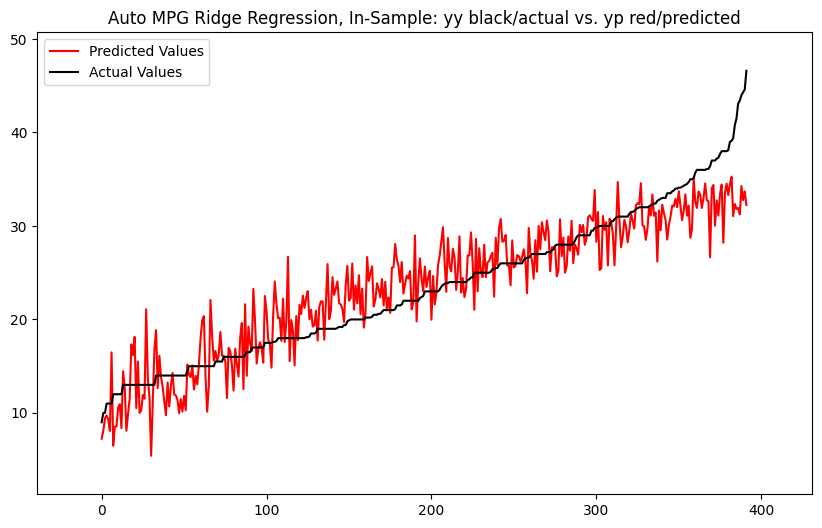

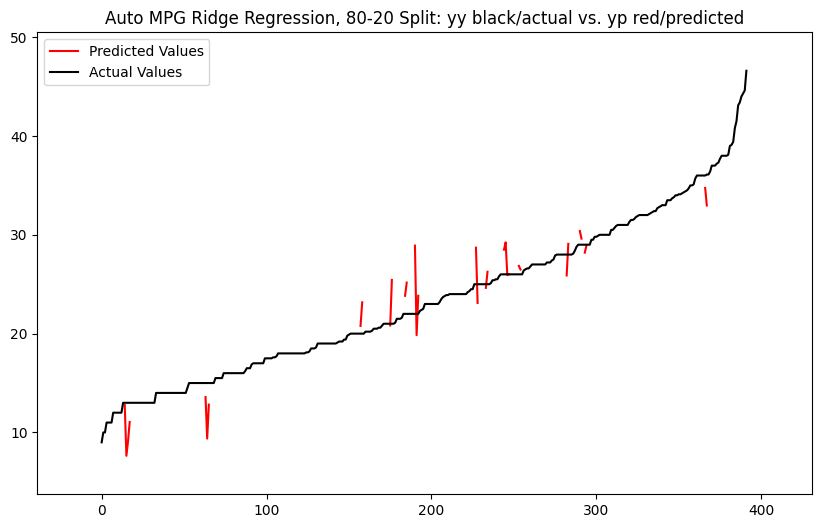

----------------------------------------------------------------------------------------
\begin{table}[h]
\centering
\caption{Statsmodels - Auto MPG Lasso Regression}
\label{tab:Statsmodels - Auto MPG Lasso Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.7008 & 0.6456 \\ \hline
rSqBar & 0.6961 & 0.6165 \\ \hline
sst & 23818.9935 & 4032.2061 \\ \hline
sse & 7126.9911 & 1428.9039 \\ \hline
sde & 4.2969 & 4.2529 \\ \hline
mse0 & 60.7627 & 51.0406 \\ \hline
rmse & 4.2969 & 4.2529 \\ \hline
mae & 3.2865 & 3.4797 \\ \hline
smape & 14.7356 & 16.1881 \\ \hline
\end{tabular}
\end{table}


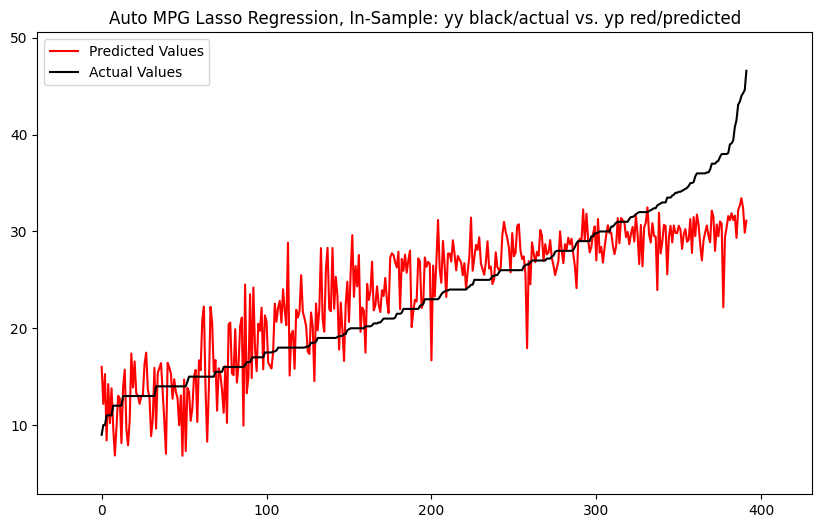

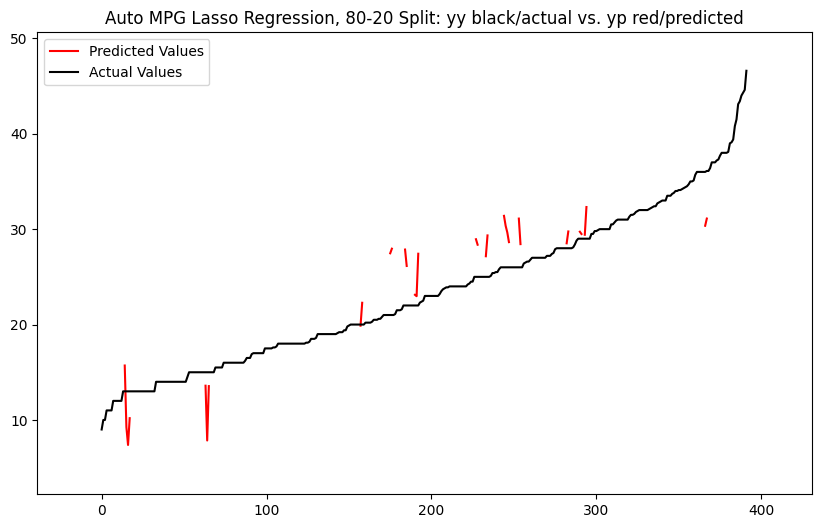

In [5]:
RegRegAutoMPG()

## Regularized Regression on House Prices

In [6]:
def RegRegHousePrice():
    #Importing and cleaning
    House_Price = pd.read_csv('house_price_regression_dataset.csv')

    # Defining the predictor and result variables
    house_price_x = House_Price[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built', 'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
    house_price_y = House_Price['House_Price']

    #Adds constants to house_price_x, splits the dataset
    house_price_x = sm.add_constant(house_price_x)
    X_train, X_test, y_train, y_test = train_test_split(house_price_x, house_price_y, test_size=0.2, random_state=42)

    #Ridge Regression Sample and Splitting
    ridge_reg_in_sample = sm.OLS(house_price_y, house_price_x).fit_regularized(L1_wt = 0)
    ridge_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 0)

    #Use split regression model to predict y values - Ridge
    y_pred_insamp_ridge = ridge_reg_in_sample.predict(house_price_x)
    y_pred_split_test_ridge = ridge_reg_split.predict(X_test)

    
    #Lasso Regression
    lasso_reg_in_sample = sm.OLS(house_price_y, house_price_x).fit_regularized(L1_wt = 1)
    lasso_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 1)

    #Use split regression model to predict y values - Lasso
    y_pred_insamp_lasso = lasso_reg_in_sample.predict(house_price_x)
    y_pred_split_test_lasso = lasso_reg_split.predict(X_test)

    k = house_price_x.shape[1] - 1

    LatexTableRidge(house_price_y, y_test, y_pred_insamp_ridge, y_pred_split_test_ridge, k, "House Price")
    sorted_plot_ridge(house_price_y, y_pred_insamp_ridge, "House Price") 
    sorted_plot_ridge(house_price_y, y_pred_split_test_ridge, "House Price", validate = True) 
    print("-" * 88)
    LatexTableLasso(house_price_y, y_test, y_pred_insamp_lasso, y_pred_split_test_lasso, k, "House Price")
    sorted_plot_lasso(house_price_y, y_pred_insamp_lasso, "House Price") 
    sorted_plot_lasso(house_price_y, y_pred_split_test_lasso, "House Price", validate = True) 

\begin{table}[h]
\centering
\caption{Statsmodels - House Price Ridge Regression}
\label{tab:Statsmodels - House Price Ridge Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.9985 & 0.9984 \\ \hline
rSqBar & 0.9985 & 0.9984 \\ \hline
sst & 64232463468052.5469 & 12891771417242.6445 \\ \hline
sse & 95249090298.3964 & 20286959701.1291 \\ \hline
sde & 9793.9029 & 10071.4844 \\ \hline
mse0 & 64232463468.0525 & 64458857086.2132 \\ \hline
rmse & 9793.9029 & 10071.4844 \\ \hline
mae & 7740.4301 & 8174.5836 \\ \hline
smape & 1.5774 & 1.6620 \\ \hline
\end{tabular}
\end{table}


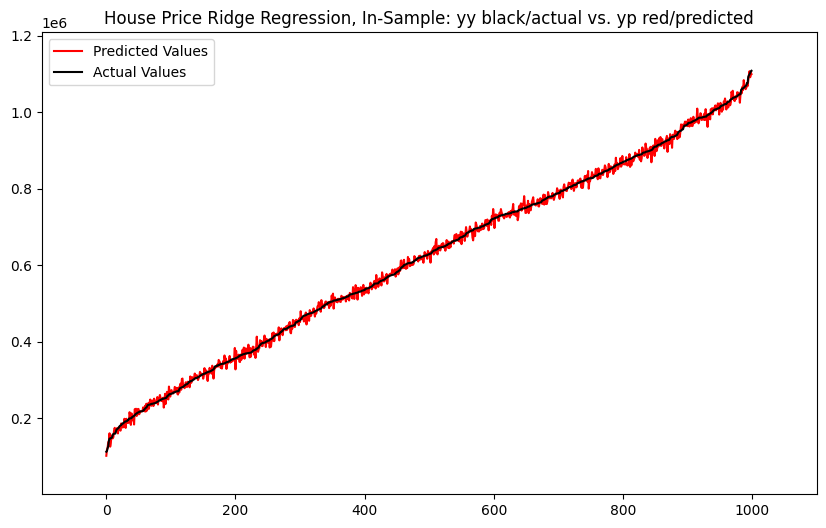

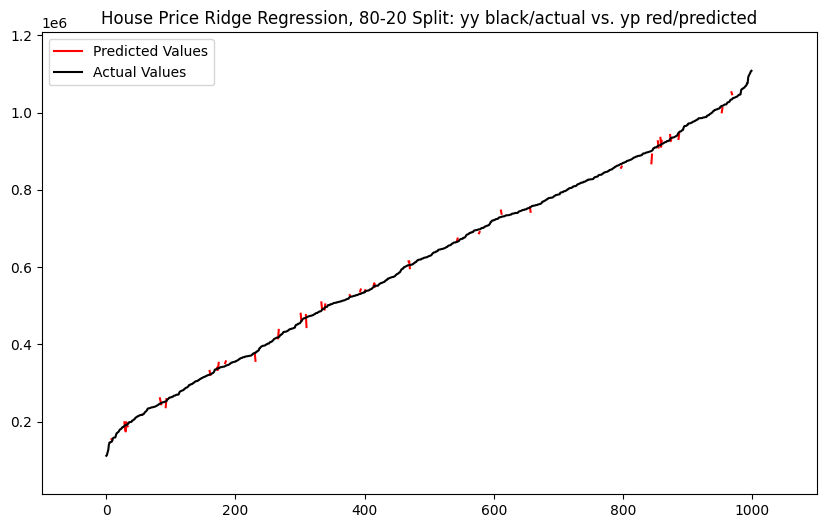

----------------------------------------------------------------------------------------
\begin{table}[h]
\centering
\caption{Statsmodels - House Price Lasso Regression}
\label{tab:Statsmodels - House Price Lasso Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.9875 & 0.9884 \\ \hline
rSqBar & 0.9875 & 0.9880 \\ \hline
sst & 64232463468052.5469 & 12891771417242.6445 \\ \hline
sse & 800195867629.4185 & 149472785468.6279 \\ \hline
sde & 28387.2634 & 27337.9576 \\ \hline
mse0 & 64232463468.0525 & 64458857086.2132 \\ \hline
rmse & 28387.2634 & 27337.9576 \\ \hline
mae & 24002.8484 & 23012.0169 \\ \hline
smape & 4.9164 & 4.6112 \\ \hline
\end{tabular}
\end{table}


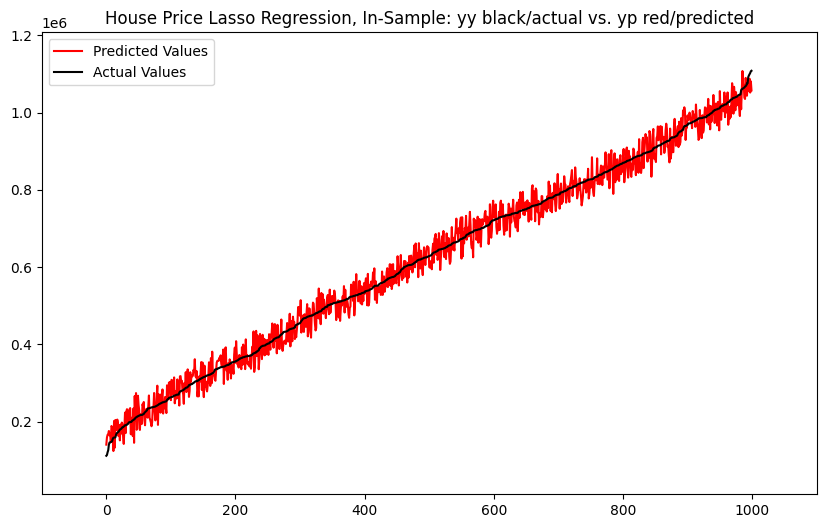

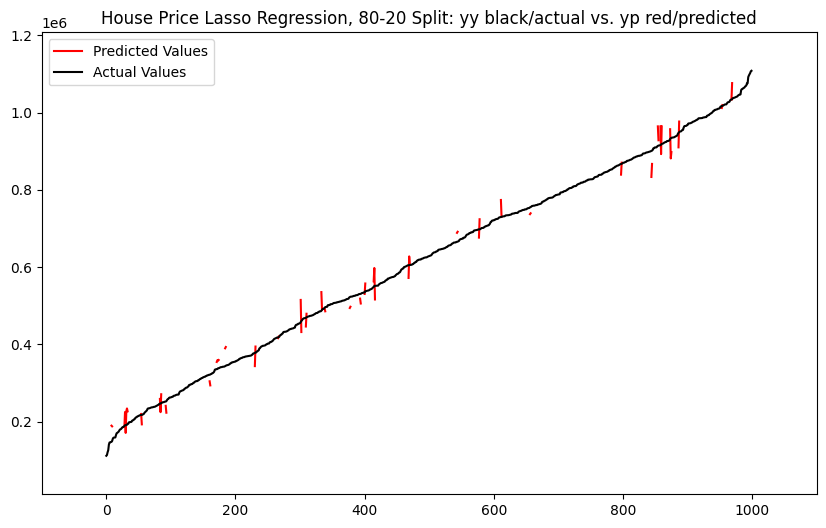

In [7]:
RegRegHousePrice()

## Regularized Regression on Insurance

In [8]:
def RegRegInsurance():
    #Importing and cleaning
    Insurance_Charges = pd.read_csv('insurance_cat2num.csv')

    # Defining the predictor and result variables
    insurance_x = Insurance_Charges[['intercept', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
    insurance_y = Insurance_Charges['charges']

    #Adds constants to house_price_x, splits the dataset
    insurance_x = sm.add_constant(insurance_x)
    X_train, X_test, y_train, y_test = train_test_split(insurance_x, insurance_y, test_size=0.2, random_state=42)

    #Ridge Regression Sample and Splitting
    ridge_reg_in_sample = sm.OLS(insurance_y, insurance_x).fit_regularized(L1_wt = 0)
    ridge_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 0)

    #Use split regression model to predict y values - Ridge
    y_pred_insamp_ridge = ridge_reg_in_sample.predict(insurance_x)
    y_pred_split_test_ridge = ridge_reg_split.predict(X_test)

    
    #Lasso Regression
    lasso_reg_in_sample = sm.OLS(insurance_y, insurance_x).fit_regularized(L1_wt = 1)
    lasso_reg_split = sm.OLS(y_train, X_train).fit_regularized(L1_wt = 1)

    #Use split regression model to predict y values - Lasso
    y_pred_insamp_lasso = lasso_reg_in_sample.predict(insurance_x)
    y_pred_split_test_lasso = lasso_reg_split.predict(X_test)

    k = insurance_x.shape[1] - 1

    LatexTableRidge(insurance_y, y_test, y_pred_insamp_ridge, y_pred_split_test_ridge, k, "Insurance")
    sorted_plot_ridge(insurance_y, y_pred_insamp_ridge, "Insurance") 
    sorted_plot_ridge(insurance_y, y_pred_split_test_ridge, "Insurance", validate = True) 
    print("-" * 88)
    LatexTableLasso(insurance_y, y_test, y_pred_insamp_lasso, y_pred_split_test_lasso, k, "Insurance")
    sorted_plot_lasso(insurance_y, y_pred_insamp_ridge, "Insurance") 
    sorted_plot_lasso(insurance_y, y_pred_split_test_ridge, "Insurance", validate = True) 

\begin{table}[h]
\centering
\caption{Statsmodels - Insurance Ridge Regression}
\label{tab:Statsmodels - Insurance Ridge Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.7509 & 0.7836 \\ \hline
rSqBar & 0.7494 & 0.7769 \\ \hline
sst & 196074221568.3671 & 41606660039.7953 \\ \hline
sse & 48839532843.9219 & 9003973448.1649 \\ \hline
sde & 6059.8229 & 5796.2847 \\ \hline
mse0 & 146542766.4935 & 155248731.4918 \\ \hline
rmse & 6059.8229 & 5796.2847 \\ \hline
mae & 4170.8869 & 4181.1945 \\ \hline
smape & 37.8059 & 40.0220 \\ \hline
\end{tabular}
\end{table}


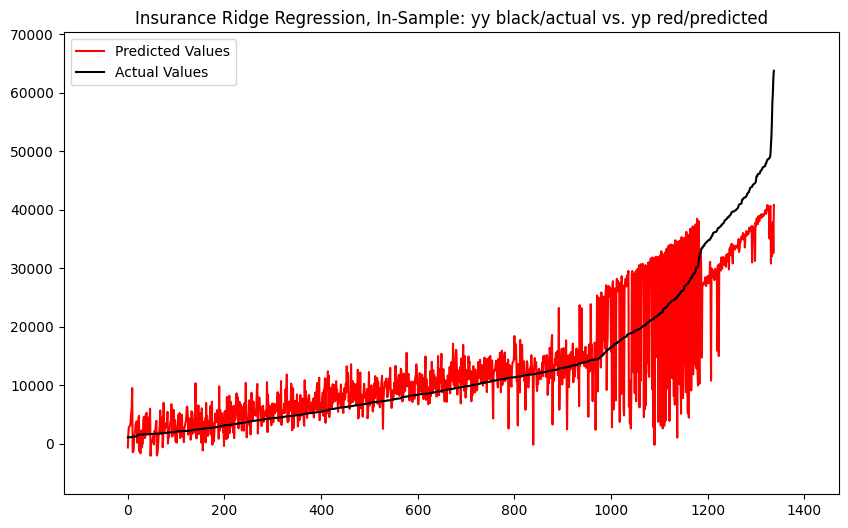

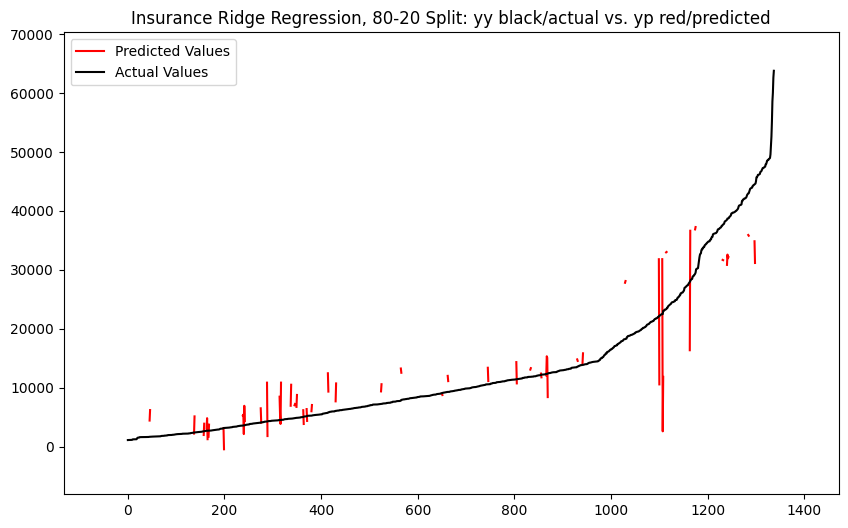

----------------------------------------------------------------------------------------
\begin{table}[h]
\centering
\caption{Statsmodels - Insurance Lasso Regression}
\label{tab:Statsmodels - Insurance Lasso Regression}
\begin{tabular}{|c|c|c|}\hline
Regression & In-Sample & 80-20 Split \\ \hline \hline
rSq & 0.7469 & 0.7798 \\ \hline
rSqBar & 0.7454 & 0.7730 \\ \hline
sst & 196074221568.3671 & 41606660039.7953 \\ \hline
sse & 49624057226.1305 & 9162436507.6489 \\ \hline
sde & 6108.2994 & 5847.0673 \\ \hline
mse0 & 146542766.4935 & 155248731.4918 \\ \hline
rmse & 6108.2994 & 5847.0673 \\ \hline
mae & 4115.6658 & 4068.7277 \\ \hline
smape & 34.2144 & 35.5634 \\ \hline
\end{tabular}
\end{table}


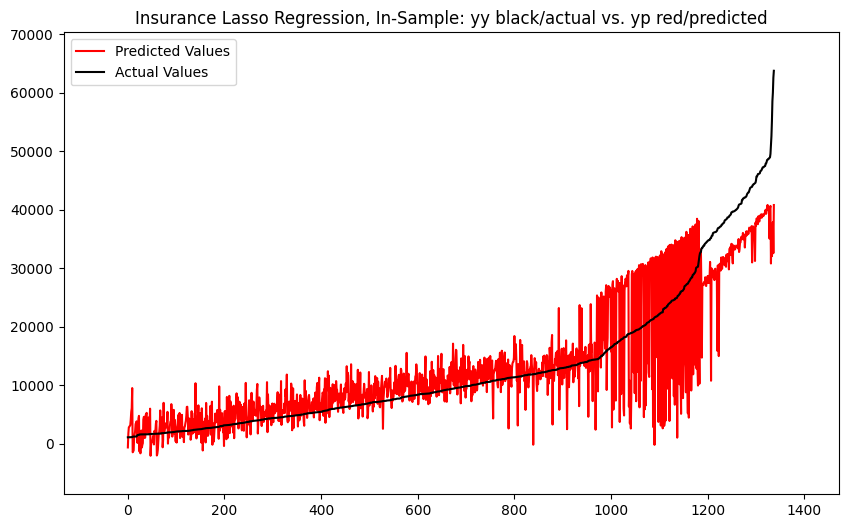

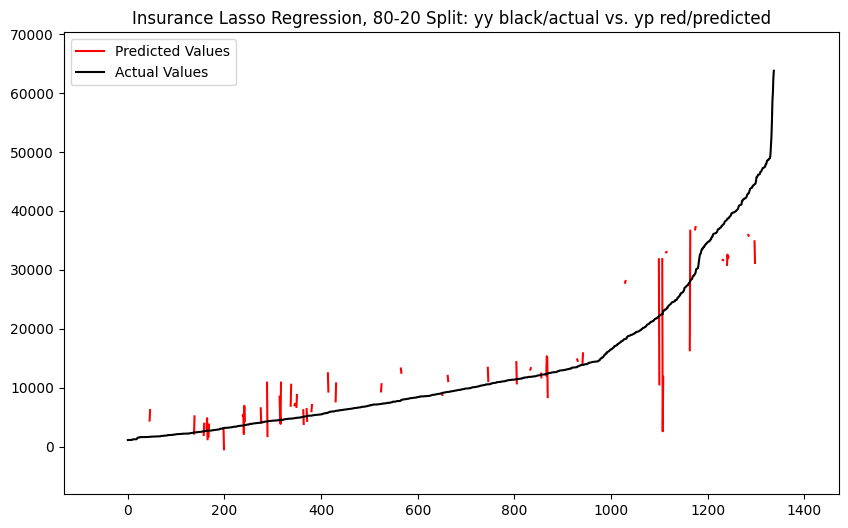

In [9]:
RegRegInsurance()